<a href="https://colab.research.google.com/github/shatabdi-sikta/Clinix-Link-Medical-NLP/blob/main/Clinix_Link_Medical_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install transformers[senrencepiece] accelerate spacy --quiet
!python -m spacy download en_core_web_sm --quiet
print("Setup 100% complete. No external Files needed.")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 76.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
Setup 100% complete. No external Files needed.


Step 1: Loading Neural Medical Model (BioBERT)... Please wait about 45 seconds.


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/266M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/373 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

Device set to use cpu


 Model Loaded.

Step 2: Starting Semantic Diagnostic Mapping...
   Analyzing Patient A-102...
   Analyzing Patient B-405...
   Analyzing Patient C-99...
   Analyzing Patient D-11...

Step 3: Generating Confidence Heatmap...


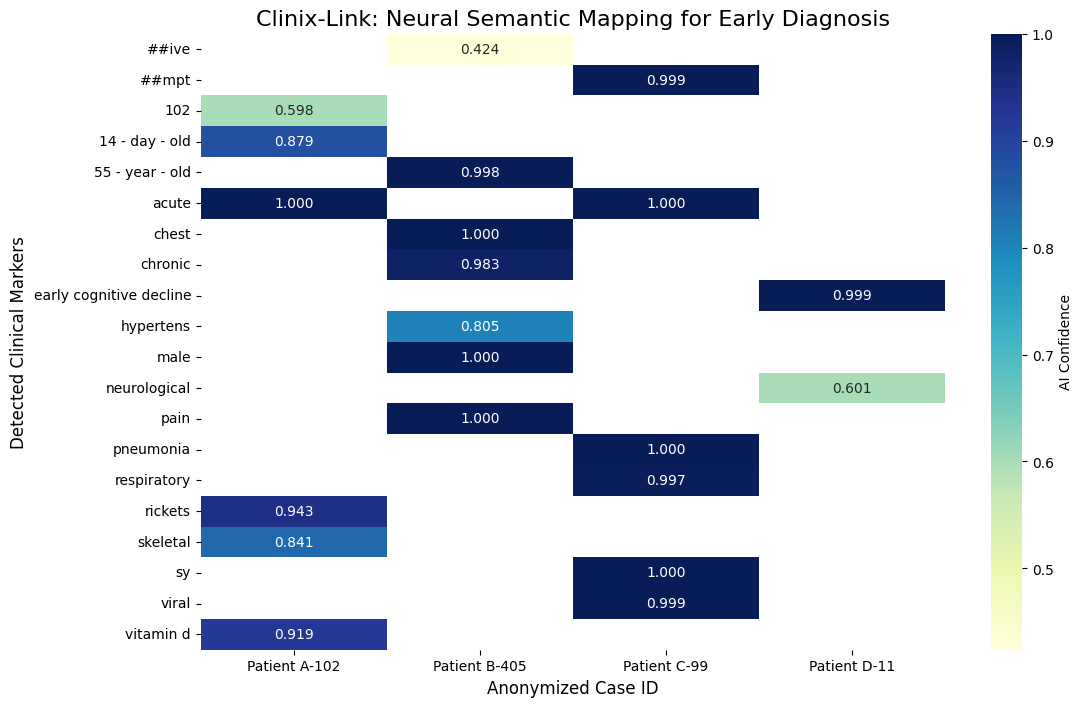


 PROJECT COMPLETE: You can now screenshot this Heatmap for your application.


In [2]:
from transformers import pipeline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


print("Step 1: Loading Neural Medical Model (BioBERT)... Please wait about 45 seconds.")
try:

    master_ner = pipeline("ner", model="d4data/biomedical-ner-all", aggregation_strategy="simple")
    print(" Model Loaded.")
except Exception as e:
    print(f" Error loading model: {e}")


clinical_notes = [
    "Patient A-102: 14-day-old infant showing skeletal rickets and acute Vitamin D deficiency.",
    "Patient B-405: 55-year-old male with chronic chest pain and history of hypertensive heart disease.",
    "Patient C-99: Symptomatic viral pneumonia leading to acute respiratory distress syndrome.",
    "Patient D-11: Early cognitive decline detected during neurological linguistic screening."
]


final_results = []
print("\nStep 2: Starting Semantic Diagnostic Mapping...")

for note in clinical_notes:

    p_id = note.split(":")[0]


    entities = master_ner(note)

    print(f"   Analyzing {p_id}...")

    for ent in entities:
        final_results.append({
            "Patient": p_id,
            "Biomarker": ent['word'],
            "Category": ent['entity_group'],
            "Confidence": round(float(ent['score']), 3)
        })


df = pd.DataFrame(final_results)


print("\nStep 3: Generating Confidence Heatmap...")
plt.figure(figsize=(12, 8))
pivot_data = df.pivot_table(index='Biomarker', columns='Patient', values='Confidence')
sns.heatmap(pivot_data, annot=True, cmap="YlGnBu", fmt=".3f", cbar_kws={'label': 'AI Confidence'})

plt.title("Clinix-Link: Neural Semantic Mapping for Early Diagnosis", fontsize=16)
plt.xlabel("Anonymized Case ID", fontsize=12)
plt.ylabel("Detected Clinical Markers", fontsize=12)
plt.show()

print("\n PROJECT COMPLETE: You can now screenshot this Heatmap for your application.")